Shape of the dataset: (10178, 12)

Columns in the dataset:
 Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB

Summary of Num

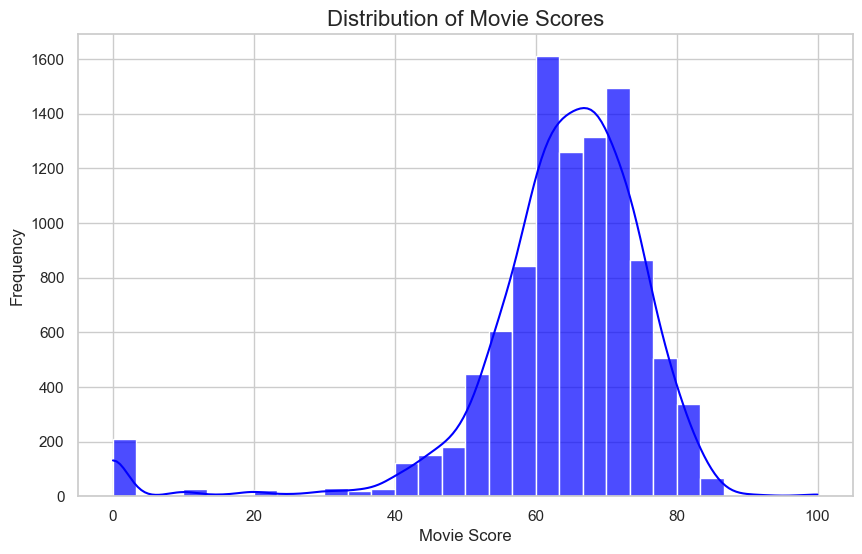

C:\Users\suhai\AppData\Local\Temp\ipykernel_4964\3423725548.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


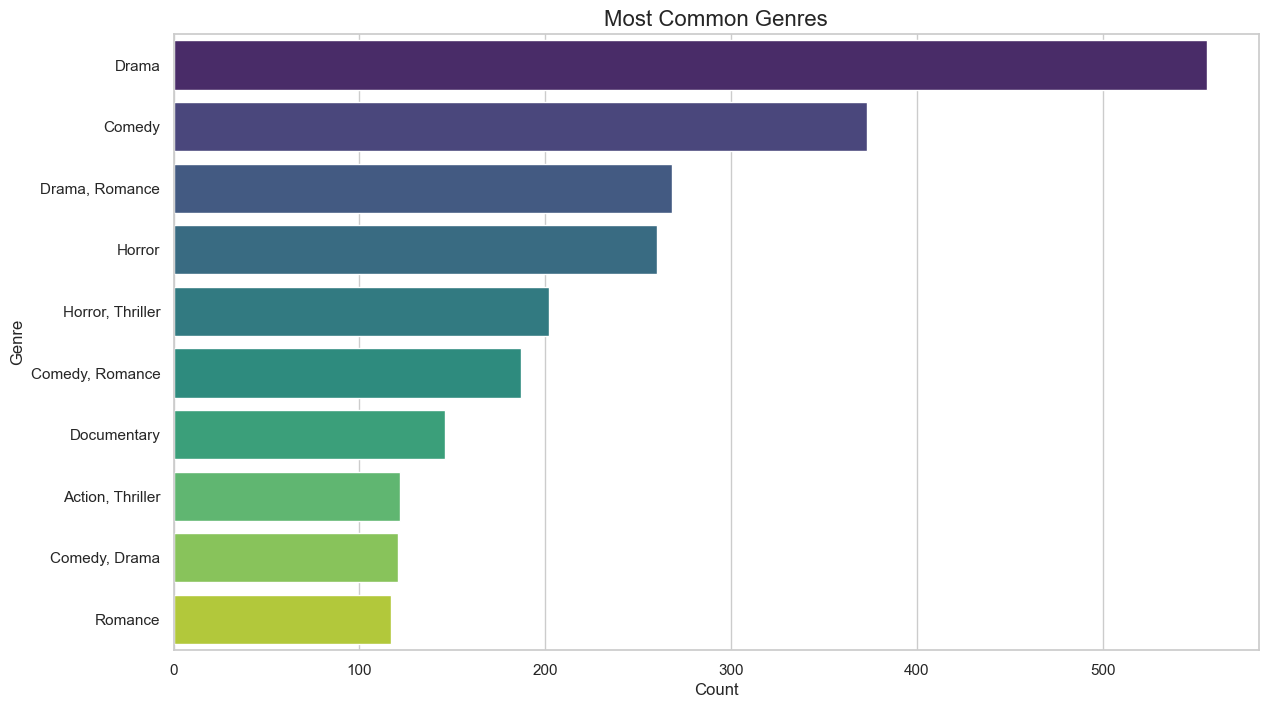

Either 'runtime' or 'score' column does not exist in the dataset.


C:\Users\suhai\AppData\Local\Temp\ipykernel_4964\3423725548.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=movies_df, x='score', y='genre', order=genre_counts.index, palette="Set2")


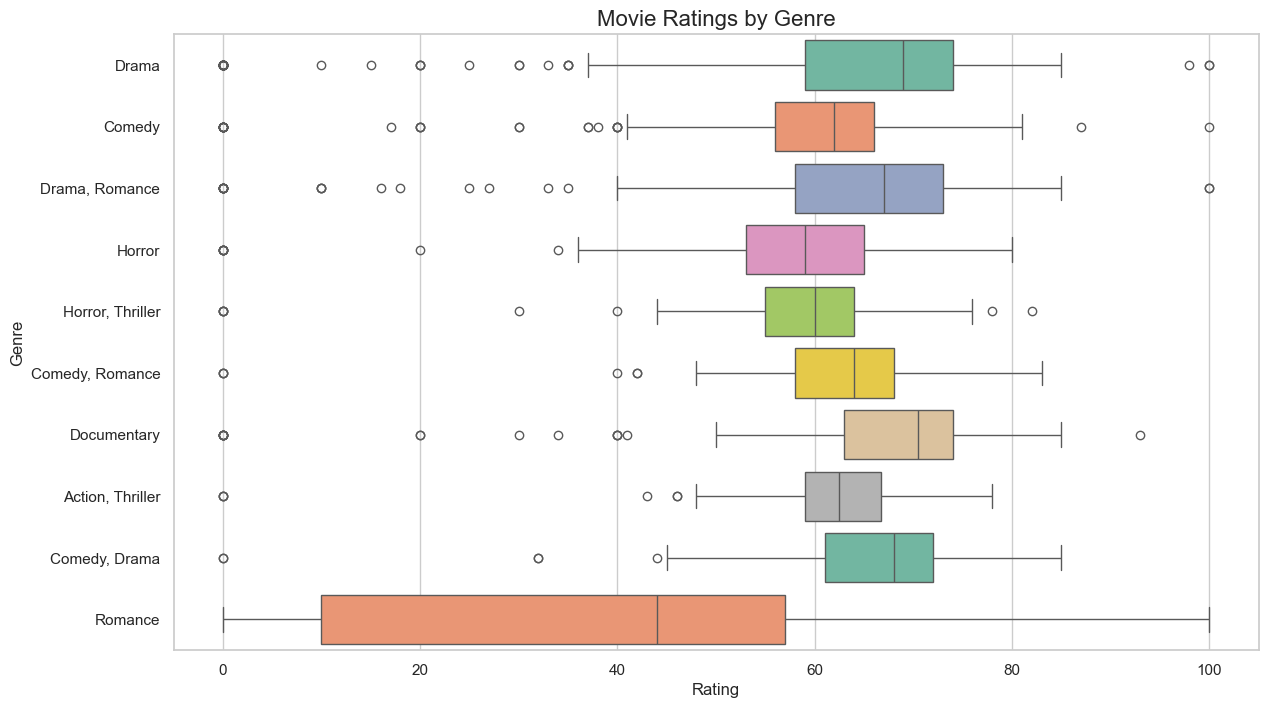

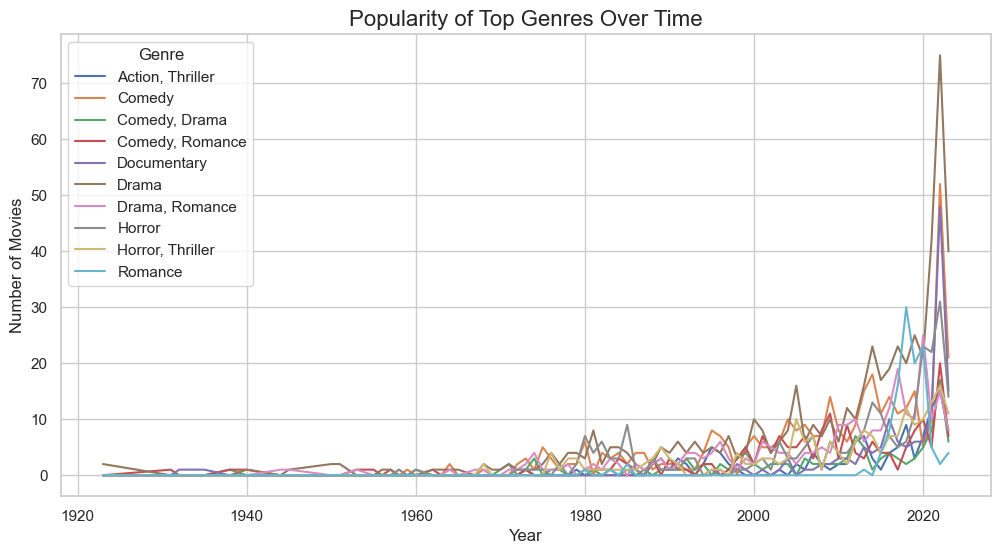

C:\Users\suhai\AppData\Local\Temp\ipykernel_4964\3423725548.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_genre.values, y=avg_rating_by_genre.index, palette="mako")


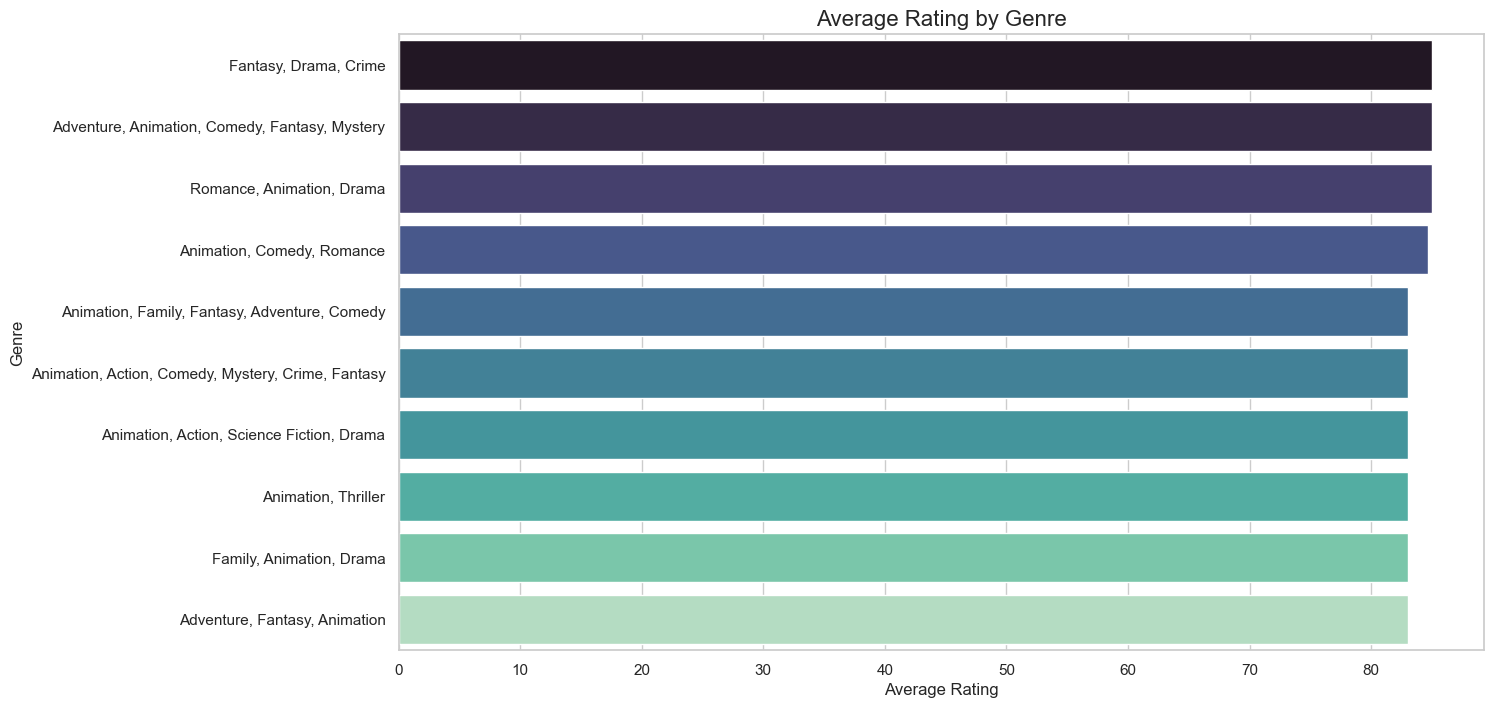

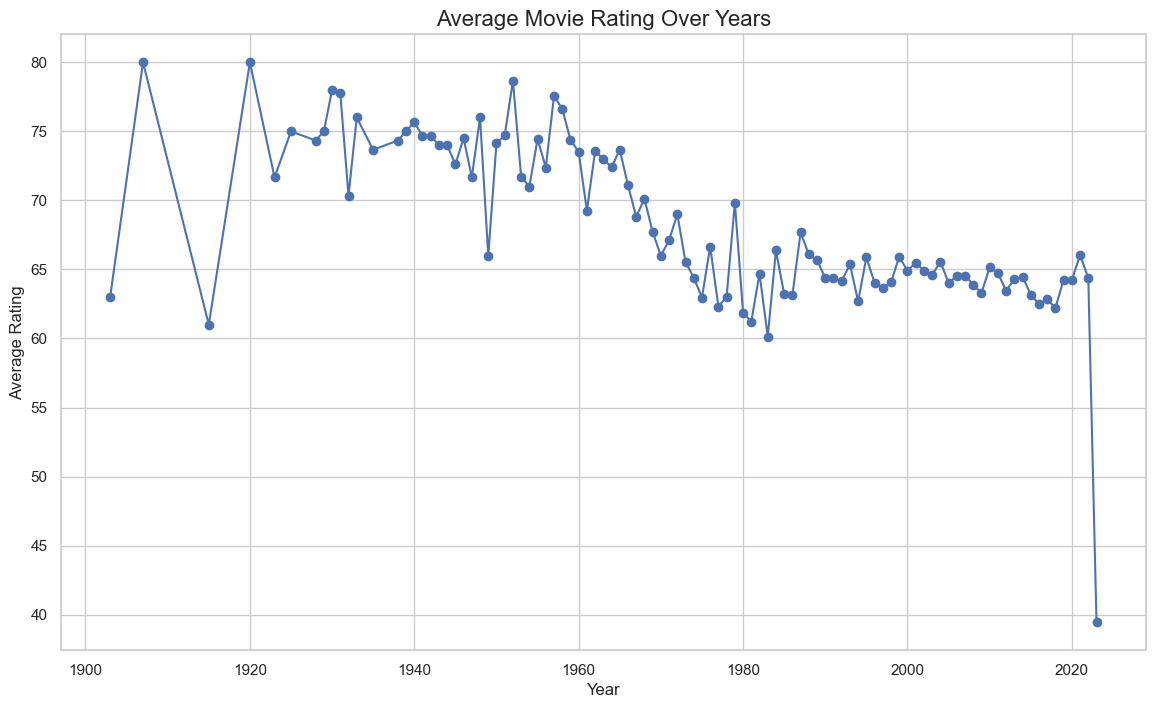

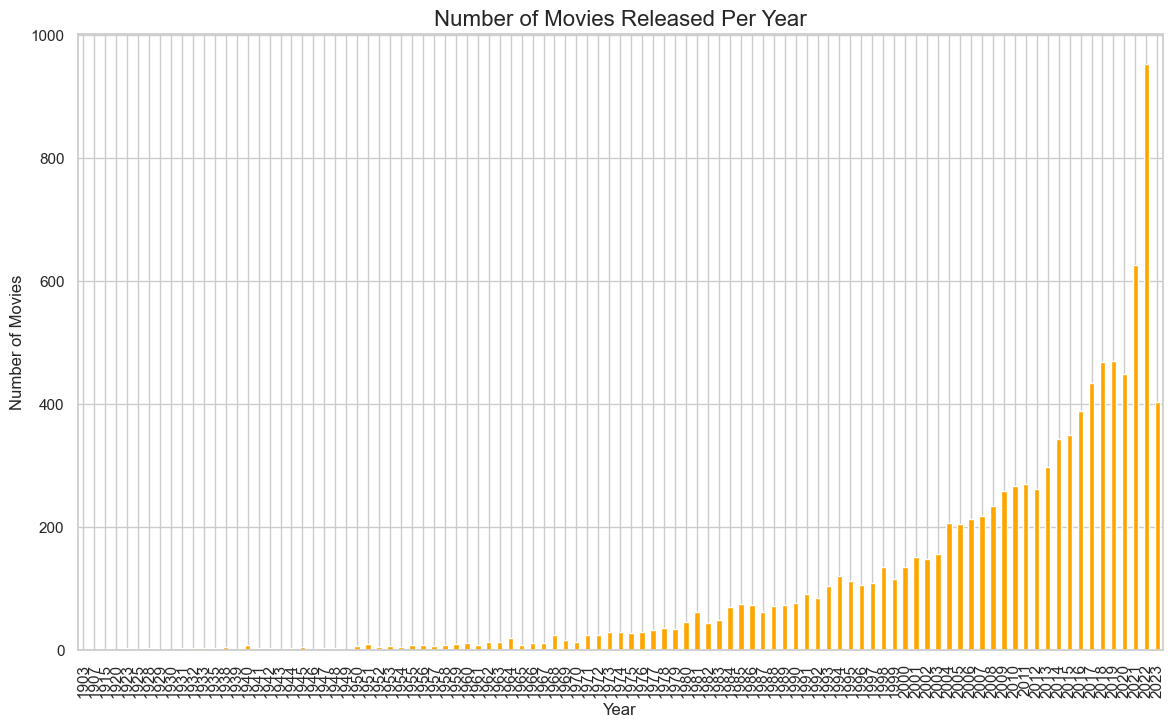

Not enough numerical columns for correlation analysis.


In [26]:
# IMDB Movie Analysis

""" **Objective:**
As a data analyst intern at IMDB, I have been tasked with exploring and analyzing the IMDB Movies dataset.
My goal is to answer specific business questions, gain insights into movie trends, and deliver actionable recommendations. 
Using Python and libraries such as Pandas, NumPy, Seaborn, and Matplotlib, perform analysis to help IMDB better understand genre popularity, 
rating trends, and factors influencing movie success."""

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
movies_df = pd.read_csv("imdb_movies.csv.zip")

# 1. Data Overview and Initial Exploration
print("Shape of the dataset:", movies_df.shape)
print("\nColumns in the dataset:\n", movies_df.columns)

# Getting an overview of data types and missing values
print("\nDataset Information:\n")
movies_df.info()

# Summary of numerical columns
print("\nSummary of Numerical Columns:\n", movies_df.describe())

# 2. Data Cleaning
# Fill missing values in 'genre' and 'crew' if they exist
if 'genre' in movies_df.columns:
    movies_df['genre'] = movies_df['genre'].fillna("Unknown")
if 'crew' in movies_df.columns:
    movies_df['crew'] = movies_df['crew'].fillna("Data Not Available")

# Convert 'date_x' to datetime format if it exists
if 'date_x' in movies_df.columns:
    movies_df['date_x'] = pd.to_datetime(movies_df['date_x'], errors='coerce')

# Checking for remaining missing values
print("\nMissing Values After Cleaning:\n", movies_df.isnull().sum())

# 3. Univariate Analysis: Numerical Variables
# Plotting the distribution of movie scores
if 'score' in movies_df.columns:
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.histplot(movies_df['score'], bins=30, kde=True, color="blue", alpha=0.7)
    plt.title("Distribution of Movie Scores", fontsize=16)
    plt.xlabel("Movie Score", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.show()

# 4. Univariate Analysis: Categorical Variables
# Most common genres
if 'genre' in movies_df.columns:
    plt.figure(figsize=(14, 8))
    genre_counts = movies_df['genre'].value_counts().head(10)  # Top 10 genres
    sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
    plt.title("Most Common Genres", fontsize=16)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel("Genre", fontsize=12)
    plt.show()

# 5. Bivariate Analysis
# Runtime vs. Rating
if 'runtime' in movies_df.columns and 'score' in movies_df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=movies_df, x='runtime', y='score', alpha=0.5)
    plt.title("Runtime vs. Rating", fontsize=16)
    plt.xlabel("Runtime (minutes)", fontsize=12)
    plt.ylabel("Movie Score", fontsize=12)
    plt.show()
else:
    print("Either 'runtime' or 'score' column does not exist in the dataset.")

# Ratings by Genre
if 'genre' in movies_df.columns and 'score' in movies_df.columns:
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=movies_df, x='score', y='genre', order=genre_counts.index, palette="Set2")
    plt.title("Movie Ratings by Genre", fontsize=16)
    plt.xlabel("Rating", fontsize=12)
    plt.ylabel("Genre", fontsize=12)
    plt.show()

# Rating vs. Votes
if 'votes' in movies_df.columns and 'score' in movies_df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=movies_df, x='votes', y='score', alpha=0.5)
    plt.title("Votes vs. Rating", fontsize=16)
    plt.xlabel("Number of Votes", fontsize=12)
    plt.ylabel("Movie Score", fontsize=12)
    plt.xscale("log")  # Log scale for better visualization
    plt.show()

# Define the number of top genres to display
top_n_genres = 10 #if i go for entire genre ,it is huge so i have to take top 10 genre.

# Calculate the total number of movies for each genre
top_genres = movies_df['genre'].value_counts().head(top_n_genres).index

if 'date_x' in movies_df.columns:
    movies_df['year'] = movies_df['date_x'].dt.year
    genre_over_time = movies_df[movies_df['genre'].isin(top_genres)].groupby(['year', 'genre']).size().unstack().fillna(0)
    genre_over_time.plot(kind='line', stacked=False, figsize=(12, 6))
    plt.title('Popularity of Top Genres Over Time', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Movies', fontsize=12)
    plt.legend(title='Genre')
    plt.show()

# 6. Genre-Specific Analysis
# Average rating per genre
if 'genre' in movies_df.columns and 'score' in movies_df.columns:
    avg_rating_by_genre = movies_df.groupby('genre')['score'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(14, 8))
    sns.barplot(x=avg_rating_by_genre.values, y=avg_rating_by_genre.index, palette="mako")
    plt.title("Average Rating by Genre", fontsize=16)
    plt.xlabel("Average Rating", fontsize=12)
    plt.ylabel("Genre", fontsize=12)
    plt.show()

# 7. Year and Trend Analysis
if 'date_x' in movies_df.columns:
    movies_df['year'] = movies_df['date_x'].dt.year
    # Average movie rating over the years
    if 'score' in movies_df.columns:
        avg_rating_by_year = movies_df.groupby('year')['score'].mean()
        plt.figure(figsize=(14, 8))
        avg_rating_by_year.plot(kind="line", marker="o", color="b")
        plt.title("Average Movie Rating Over Years", fontsize=16)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Average Rating", fontsize=12)
        plt.grid(True)
        plt.show()

    movie_releases_by_year = movies_df['year'].value_counts().sort_index()
    plt.figure(figsize=(14, 8))
    movie_releases_by_year.plot(kind="bar", color="orange")
    plt.title("Number of Movies Released Per Year", fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Number of Movies", fontsize=12)
    plt.show()


# 8. Multivariate Analysis
# Heatmap of correlations
cols_to_check = ['score', 'votes', 'runtime']
available_cols = [col for col in cols_to_check if col in movies_df.columns]
if len(available_cols) >= 2:
    correlation_matrix = movies_df[available_cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Between Variables", fontsize=16)
    plt.show()
else:
    print("Not enough numerical columns for correlation analysis.")
